# Toma de contacto con las imágenes

En este Notebook vamos a realizar una primera toma de contacto con el conjunto de datos (en el challenge original, "Train dataset"). En primer lugar, importamos las librerías de Python que vamos a utilizar.

In [89]:
import numpy as np  
from matplotlib import pyplot as plt, cm
import h5py
import pandas as pd
import glob
import os
import seaborn as sns

In [59]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

Establecemos el "base folder". En esta carpeta están ubicadas las diferentes imágenes siguiendo esta estructura:

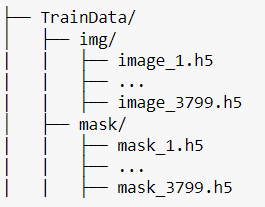

Las imágenes etiquetadas con la ubicación de los deslizamientos se encuentran en la carpeta "mask", mientras que las imágenes de entrenamiento se encuentran en la carpeta "img". La estructura es similar a la que se puede encontrar en los datos descargados de: https://cloud.iarai.ac.at/index.php/s/KrwKngeXN7KjkFm 
En total hay 3799 imágenes en cada carpeta.

In [60]:
base_folder=r"C:\temp\UOC\TrainData"
#base_folder= r'C:\Users\serra\OneDrive\Documents\DATA\train'
train_folder = base_folder + "\\img\*.h5"
mask_folder = base_folder + "\\mask\*.h5"

Cada imagen (en formato h5) está compuesta por una malla de 14 bandas de 128x128 píxeles. Visualizamos una imagen cualquiera (en este caso, "image_1.h5")

<KeysViewHDF5 ['img']>
(128, 128, 14)


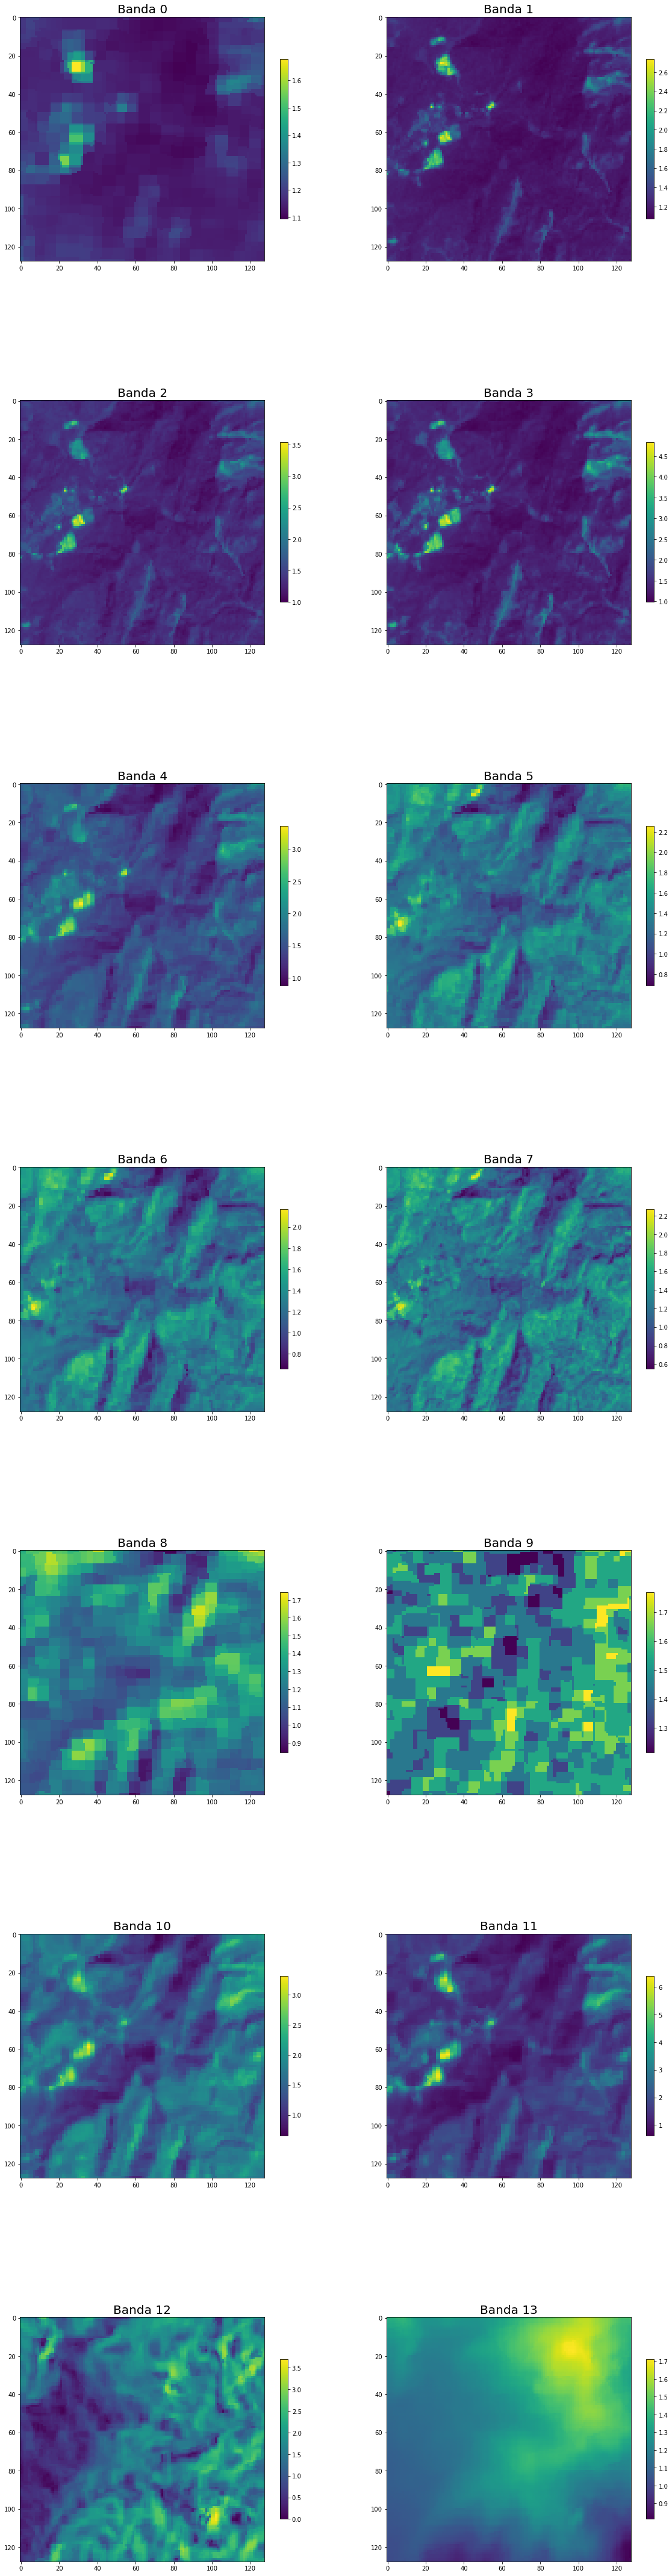

In [61]:
cmap = cm.viridis
fichero_ejemplo = os.path.join (base_folder, 'img\image_1.h5')
example_dt = h5py.File(fichero_ejemplo,'r')

print(example_dt.keys())

images = example_dt['img']
print(images.shape)

fig, ax = plt.subplots(7,2,figsize = (20,80))

for i in range(14):
    img_np = images[:,:,i]
    plt.subplot(7,2,1+i)
    d= plt.imshow(img_np, cmap=cmap)
    plt.title("Banda " + str(i) ,fontdict={'fontsize': 20})
    plt.colorbar(shrink=0.5)
plt.show()


Cada una de estas bandas se corresponde con:
- Datos multiespectrales de Sentinel-2: B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11, B12.

- Pendiente (del dataset ALOS Palsar): B13.

- Modelo digital de elevaciones (del dataset Alos Palsar): B14.

A continuación, visualizamos el fichero de máscara correspondiente con la imagen anterior:


<KeysViewHDF5 ['mask']>
(128, 128)


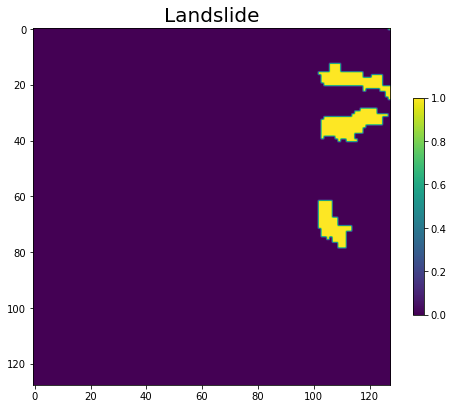

In [62]:
fichero_mask = os.path.join (base_folder, 'mask\mask_1.h5')
example_mask = h5py.File(fichero_mask,'r')

print(example_mask.keys())

masks = example_mask['mask']
print(masks.shape)
plt.figure(figsize = (8,8))
plt.imshow(masks) 
plt.title("Landslide" ,fontdict={'fontsize': 20})
plt.colorbar(shrink=0.5)

Las imágenes etiquetadas ("mask") siguen la siguiente clasificación:

- No deslizamiento: 0
- Deslizamiento: 1


Tambiñen podemos visualizar los valores en las diferentes bandas sólo para aquellas zonas en las que se ha etiquetado un deslizamiento.

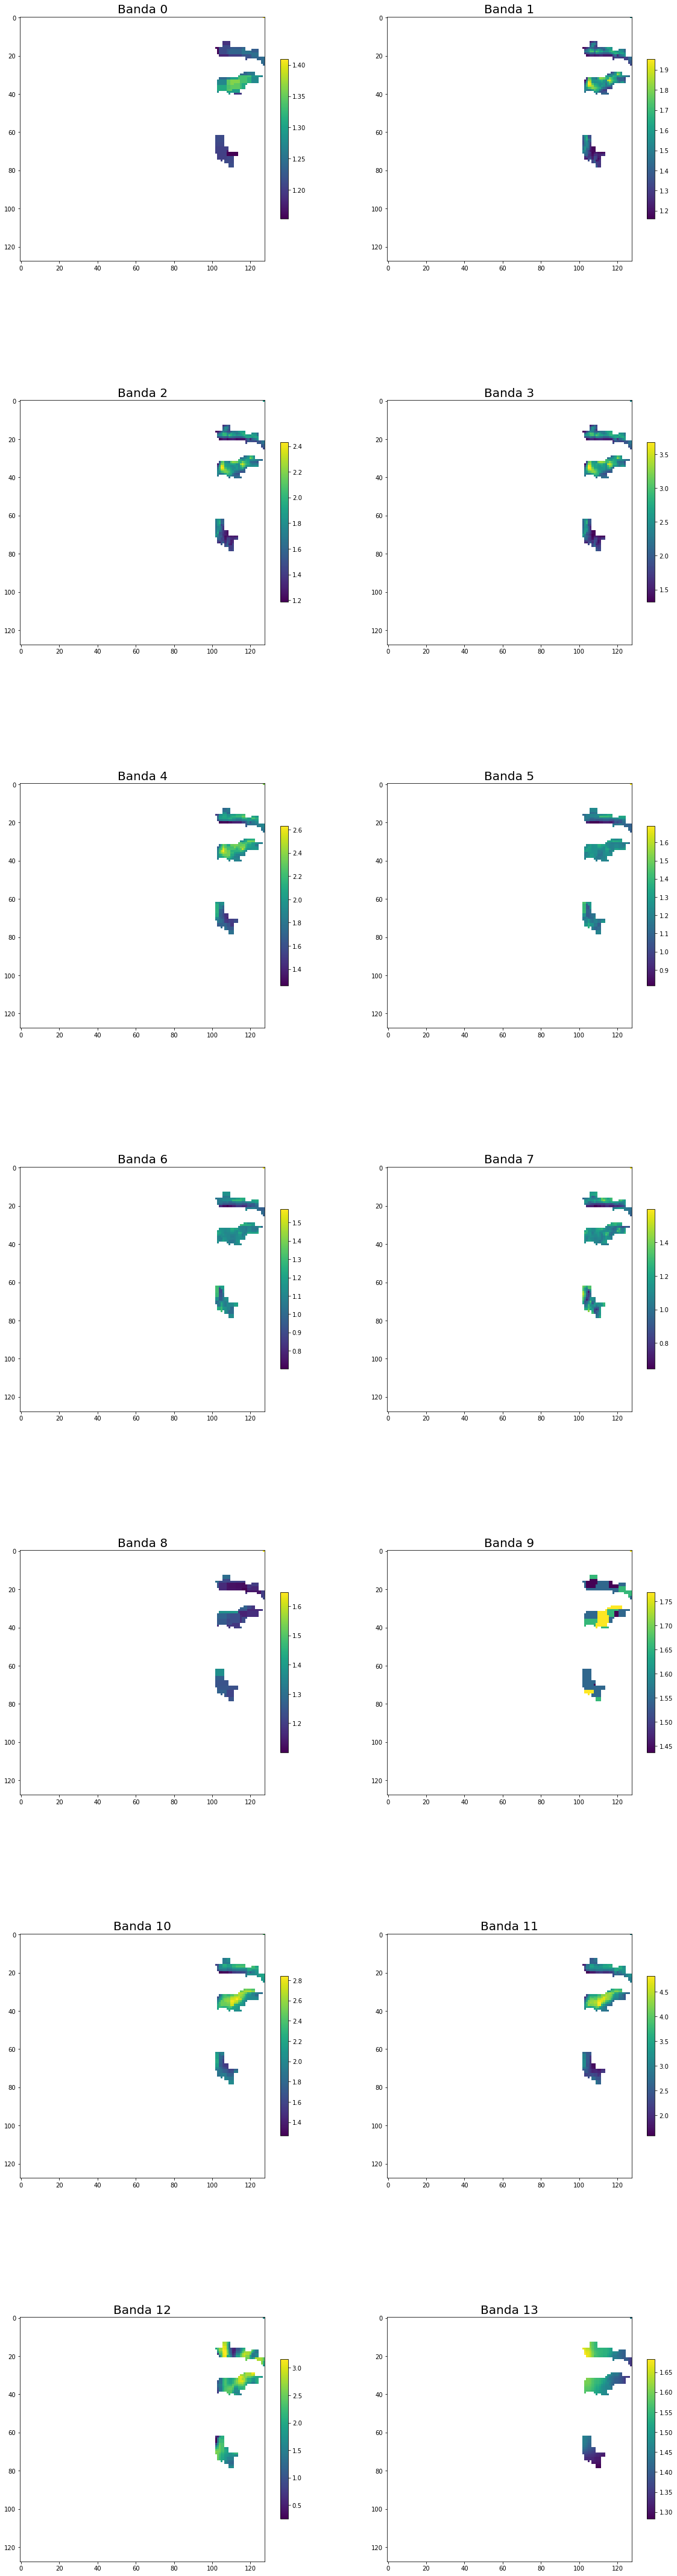

In [63]:
#masked rasters (i.e. terrain with and without landslides)
plt.subplots(1,figsize = (20,80))

for i in range(14):
    img_np = images[:,:,i]
    new_img_np= np.ma.array(img_np, mask=np.logical_not(masks)) #landslide
    plt.subplot(7,2,1+i)
    plt.imshow(new_img_np)
    plt.title("Banda " + str(i) ,fontdict={'fontsize': 20})
    plt.colorbar(shrink=0.5)
plt.show()

## Examinando los valores en las imágenes

Una primera opción pasa por extraer una serie de puntos (hasta 50) aleatóriamente de cada imagen/banda.
Siguiendo con la imagen anterior, obtenemos para las zonas en las que existe deslizamiento:

In [128]:
#Select 50 random points from masked area and extract values LANDSLIDE
np.random.seed(123)#seed

coord_landslide= []
da_landslide= pd.DataFrame(columns= {"p/a", "x", "y"})
new_img_np= np.ma.array(img_np, mask=np.logical_not(masks)) #landslide mask

for j in range (50):
        x,y = np.where(new_img_np.mask <=False) #select only landslide values
        k = np.random.randint(len(x))
        random_pos = [x[k],y[k]] #select random location
        coord_landslide.append(random_pos) #coordinates
        da_landslide.loc[j,["x"]]= random_pos[0] #table
        da_landslide.loc[j,["y"]]= random_pos[1] #table
        
for i in range(14):
    img_np= images[:,:,i] #each of the 14 bands
    for j in range (50):
        da_landslide.loc[j,[i]]= img_np[coord_landslide[j][0], coord_landslide[j][1]] #extract the values and put them in the table
        da_landslide.loc[j,["p/a"]]= 1 #landslide presence (table)


Y para las áreas en las que no existe deslizamiento:

In [129]:
#Select 50 random points from masked area and extract values NOT LANDSLIDE
np.random.seed(123)#seed

coord_nolandslide= []
da_nolandslide= pd.DataFrame(columns= {"p/a", "x", "y"})
new_img_np= np.ma.array(img_np, mask=masks) #not landslide mask

for j in range (50):
        x,y = np.where(new_img_np.mask <=False) #select only not landslide values
        k = np.random.randint(len(x))
        random_pos = [x[k],y[k]] #select random locations
        coord_nolandslide.append(random_pos) #coordinates
        da_nolandslide.loc[j,["x"]]= random_pos[0] #table
        da_nolandslide.loc[j,["y"]]= random_pos[1] #table
        
for i in range(14):
    img_np= images[:,:,i] #each of the 14 bands
    for j in range (50):
        da_nolandslide.loc[j,[i]]= img_np[coord_nolandslide[j][0], coord_nolandslide[j][1]] #extract the values and put them in the table
        da_nolandslide.loc[j,["p/a"]]= 0 #landslide presence (table)

La ubicación de los puntos puede verse en la siguiente imagen:

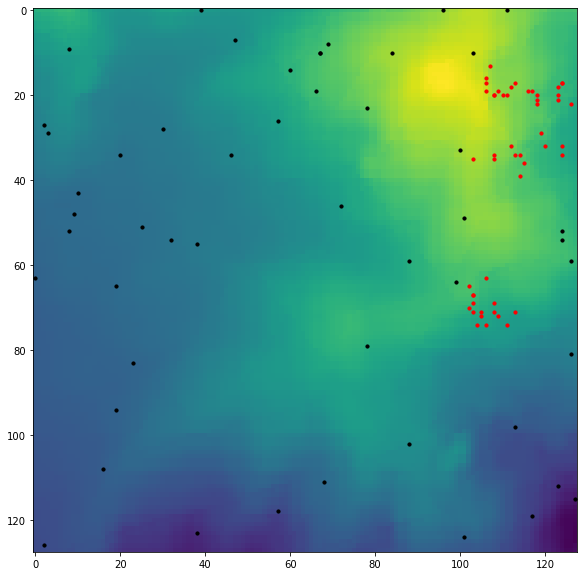

In [66]:
#plot
    
y_landslide, x_landslide = zip(*coord_landslide) #plotting the random coordinates on the map    
y_nolandslide, x_nolandslide = zip(*coord_nolandslide) #plotting the random coordinates on the map
plt.figure(figsize=(10,10))
plt.scatter(x_nolandslide,y_nolandslide, s= 10, c= "black")
plt.scatter(x_landslide,y_landslide, s= 10, c= "red")

plt.imshow(img_np)

In [139]:
da= pd.concat([da_nolandslide, da_landslide], ignore_index=True, axis=0)
da["id"]= example_dt.filename
da.head(100)

,x,p/a,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,id
0,29,0,3,1.149475,1.195685,1.308379,1.394964,1.540586,1.372974,1.349184,1.262542,1.335162,1.436802,1.452445,1.457962,1.576954,1.211131,C:\temp\UOC\TrainData\img\image_1.h5
1,126,0,2,1.210636,1.347268,1.632459,1.987992,1.890508,1.303841,1.263489,1.225453,1.088898,1.326278,1.854606,2.396596,0.689917,1.019627,C:\temp\UOC\TrainData\img\image_1.h5
2,94,0,19,1.151273,1.178708,1.249592,1.282648,1.367173,1.202402,1.201258,1.195577,1.103734,1.326278,1.097862,1.007878,0.542078,1.094676,C:\temp\UOC\TrainData\img\image_1.h5
3,10,0,67,1.110799,1.109586,1.116946,1.084972,1.048218,0.978850,0.986001,0.925143,1.120052,1.215755,0.957824,0.929018,1.724794,1.442747,C:\temp\UOC\TrainData\img\image_1.h5
4,98,0,113,1.146776,1.209025,1.272203,1.421919,1.421364,1.288334,1.246146,1.247603,1.293623,1.657848,1.695716,1.758017,2.365431,1.066209,C:\temp\UOC\TrainData\img\image_1.h5
5,43,0,10,1.162067,1.175070,1.217938,1.253446,1.385753,1.235354,1.233394,1.142005,1.272854,1.326278,1.404868,1.419493,0.689917,1.129612,C:\temp\UOC\TrainData\img\image_1.h5
6,112,0,123,1.172860,1.215088,1.281247,1.527496,1.638130,1.170743,1.156371,0.973048,1.112635,1.547325,1.956941,2.623561,2.168312,0.938109,C:\temp\UOC\TrainData\img\image_1.h5
7,123,0,38,1.181854,1.242979,1.347570,1.462353,1.540586,1.422078,1.386931,1.473738,1.194228,1.547325,1.756759,1.804179,1.971193,0.923875,C:\temp\UOC\TrainData\img\image_1.h5
8,63,0,0,1.172860,1.209025,1.330989,1.408442,1.526651,1.325808,1.338982,1.379987,1.263953,1.547325,1.356394,1.369484,0.542078,1.097264,C:\temp\UOC\TrainData\img\image_1.h5
9,115,0,127,1.182754,1.229640,1.367166,1.505033,1.724837,1.404633,1.386421,1.500009,1.121536,1.436802,2.133784,2.579322,2.414711,0.876000,C:\temp\UOC\TrainData\img\image_1.h5


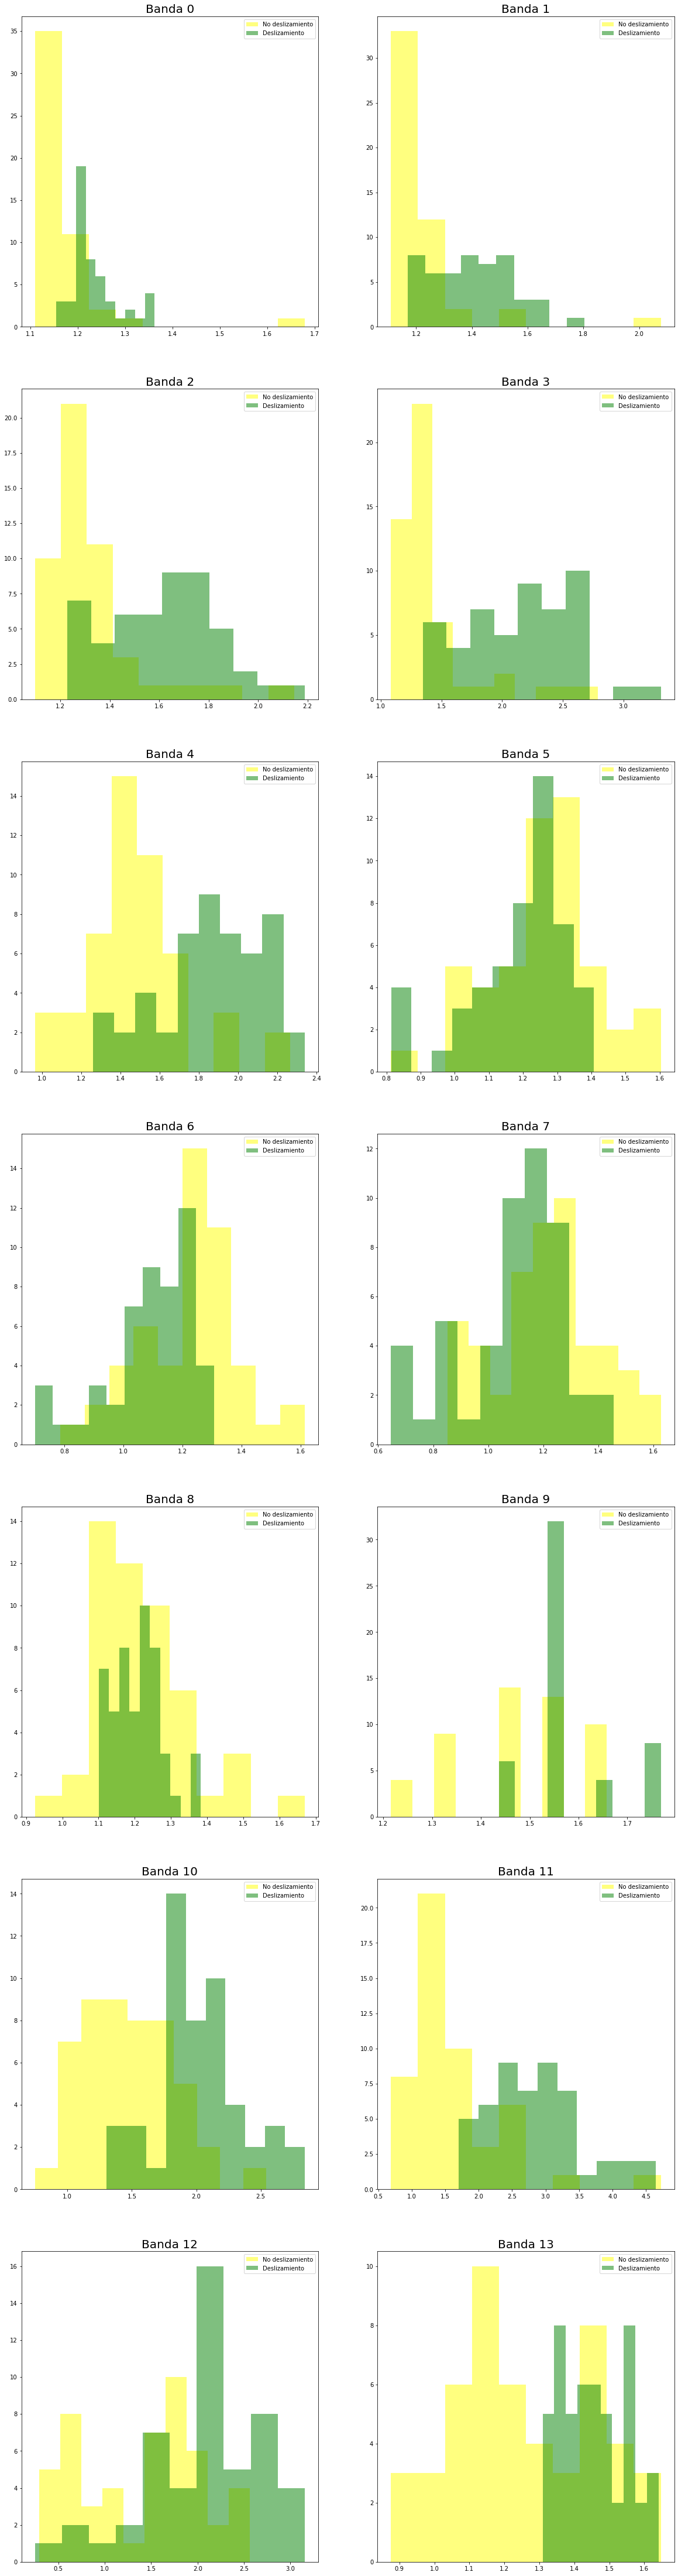

In [147]:
plt.subplots(1,figsize = (20,80))
for i in range(14):
    da_banda = da[['p/a',i]]
    plt.subplot(7,2,1+i)
    plt.hist(da_banda[da_banda['p/a']==0][i], alpha=0.5, label='No deslizamiento', bins=10, color="yellow")
    plt.hist(da_banda[da_banda['p/a']==1][i], alpha=0.5, label='Deslizamiento', bins=10, color="green")
    plt.title("Banda " + str(i) ,fontdict={'fontsize': 20})
    plt.legend(loc='upper right')
plt.show()


Vamos a visualizar al continuación la distribución estadística de los datos en las diferentes bandas, incluyendo la imagen etiquetada. Para cada imagen/banda recogemos: valor mínimo, máximo, media y desviación estándar, en ambos casos: zona sin deslizamiento de la imagen y zona con deslizamiento. Aprovechamos para identificar si alguna imagen tiene datos nulos (aparentemente ninguna imagen/banda los tiene).

In [ ]:
da_landslide = pd.DataFrame(columns={"imagen", "min_m", "max_m", "min_i", "max_i", "banda"})
bandas = ("B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "B12", "B13", "B14")

for fichero_t in glob.glob(train_folder):
    f_name = os.path.basename(fichero_t)
    f_name = f_name.replace("image", "mask")
    base_folder_m = base_folder + "\\mask"
    fichero_m = os.path.join(base_folder_m,  f_name)
    if (os.path.exists(fichero_m)):
        mask_imagen = h5py.File(fichero_m, 'r')
        masks = mask_imagen['mask']
        #l = np.count_nonzero(masks)
        #if l == 0: continue
        masks_array = np.ma.array(masks)
        train_imagen = h5py.File(fichero_t, 'r')
        imagen = train_imagen['img']
        num_bandas = imagen.shape[2]
        for i in range(num_bandas):
            banda = imagen[:, :, i]
            banda_tot = np.ma.array(banda)
            if (np.isnan(banda_tot).any()):
                print(fichero_t)
            banda_img = np.ma.masked_where(masks_array >= True, banda)
            banda_masks = np.ma.masked_where(masks_array < True, banda)
            indice = len(da_landslide)
            banda_masks = banda_masks.filled(np.nan)
            banda_img = banda_img.filled(np.nan)
            da_landslide.loc[indice, ["imagen"]] = f_name
            da_landslide.loc[indice, ["banda"]] = bandas[i]
            da_landslide.loc[indice, ["min_i"]] = np.nanmin(banda_img)
            da_landslide.loc[indice, ["max_i"]] = np.nanmax(banda_img)
            da_landslide.loc[indice, ["mean_i"]] = np.nanmean(banda_img)
            da_landslide.loc[indice, ["std_i"]] = np.nanstd(banda_img)
            da_landslide.loc[indice, ["min"]] = banda_tot.min()
            da_landslide.loc[indice, ["max"]] = banda_tot.max()
            da_landslide.loc[indice, ["std"]] = banda_tot.std()
            da_landslide.loc[indice, ["mean"]] = banda_tot.mean()
            if not (np.isnan(banda_masks).all()):
                da_landslide.loc[indice, ["min_m"]] = np.nanmin(banda_masks)
                da_landslide.loc[indice, ["max_m"]] = np.nanmax(banda_masks)
                da_landslide.loc[indice, ["mean_m"]] = np.nanmean(banda_masks)
                da_landslide.loc[indice, ["std_m"]] = np.nanstd(banda_masks)

    #print(fichero_t)

Guardamos la información obtenida en un fichero CSV.

In [ ]:
da_landslide.to_csv("parametros_imagenes.csv")

A partir de la información anterior, para cada banda generamos un histograma con:
- min_m . El valor mínimo de la banda en las áreas con deslizamiento
- max_m . El valor máximo de la banda en las áreas con deslizamiento
- mean_m . El valor medio de la banda en las áreas con deslizamiento
- min_i . El valor mínimo de la banda en las áreas sin deslizamiento
- max_i . El valor máximo de la banda en las áreas sin delizamiento
- mean_i . El valor medio de la banda en las áreas con deslizamiento 

In [ ]:
da_landslide = pd.read_csv("parametros_imagenes.csv")
for i in range(14):
    da_landslide_banda = da_landslide[da_landslide['banda']==bandas[i]]
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    df = pd.DataFrame(da_landslide_banda[["min_m","max_m","mean_m","min_i","max_i","mean_i"]])
    df.plot.hist(ax=ax, subplots=True,  bins=50 , layout=(2,3), title = bandas[i]) 


Uno de los elementos que cabe mencionar del gráfico anterior es el caracter "serrado" de los histogramas de pendientes y elevaciones (DEM), bandas 13 y 14. Esto indica una concentración de celdas en torno a unos valores determinados. Aparentemente el modelo de pendientes se ha elaborado a partir del modelo digital de elevaciones (DEM). Esto podría indicar que el DEM se ha interpolado a partir de curvas de nivel (los picos indicarían los valores de las curvas de nivel que son equidistantes en un mapa 2D).

Este hecho es relevante porque nos obligará más adelante a considerar el tratamiento de estas dos bandas (pendiente y modelo digital de elevaciones).

Agregamos los datos para obtener el valor máximo y mínimo de cada banda:

In [ ]:
aggr_landslide = da_landslide.groupby('banda').agg(MIN_V=('min','min'), MAX_V=('max','max')).reset_index()
aggr_landslide.head(15)